# Librerias

# DESAFIO 2. Datos de Billboard

## Paso 1. Explorar los datos

Cargá el dataset usando Pandas y comenzá a explorar los datos. Guardá en este espacio todos los procesos y análisis exploratorios que hayas hecho, tanto los preliminares como los definitivos. Por favor, indicá cuál(es) es(son) cada uno(s).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('billboard.csv',encoding='latin-1')
df.head(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dtypes.head(10)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
dtype: object

In [11]:
df.info

<bound method DataFrame.info of      year      artist.inverted  \
0    2000      Destiny's Child   
1    2000              Santana   
2    2000        Savage Garden   
3    2000              Madonna   
4    2000  Aguilera, Christina   
5    2000                Janet   
6    2000      Destiny's Child   
7    2000    Iglesias, Enrique   
8    2000                Sisqo   
9    2000             Lonestar   
10   2000               N'Sync   
11   2000  Aguilera, Christina   
12   2000     Vertical Horizon   
13   2000                Creed   
14   2000              Aaliyah   
15   2000      matchbox twenty   
16   2000        Carey, Mariah   
17   2000          Hill, Faith   
18   2000                  Mya   
19   2000                Dream   
20   2000        Braxton, Toni   
21   2000        Anthony, Marc   
22   2000                  98¡   
23   2000      Destiny's Child   
24   2000         3 Doors Down   
25   2000                Sisqo   
26   2000  Aguilera, Christina   
27   2000     Ho

Escribí un breve descripción de los datos. Hacé particular énfasis en los hallazagos que te parezcan relevantes hasta este punto.

Vamos a cambiar el tipo de dato a time, date.entered y date.peacked
Eliminamos las columnas de las semanas 66 en adelante ya que ninguna tiene datos
Vamos a hacer un melt con las semanas y el ranking
El genero nos parece poco descriptivo de los artistas, asi que creamos un nuevo dataset con los artistas y su genero scrapeando la web de All Music. 

## Paso 2. Limpieza de los datos

Empezá por una limpieza rudimentaria. Reformulá los nombres desprolijos de las variables para que tengan un criterio común, acortá los strings que sean muy largos, buscá datos missing y realizá una imputación (en caso de que te parezca que esto es necesario). En aquellos casos en que decidas que es necesario imputar, explicá cuál es el motivo y justificá la técnica que hayas utilizado para imputar.

In [12]:
df['time'] = df['time'].apply(lambda x : int(str(x).split(':')[0])*60 + int(str(x).split(':')[1]))

In [13]:
df['artist.inverted'] = df['artist.inverted'].apply(lambda x : str(x))
df['track'] = df['track'].apply(lambda x : str(x))
df['genre'] = df['genre'].apply(lambda x : str(x))
df['date.entered'] = pd.to_datetime(df['date.entered'])
df['date.peaked'] = pd.to_datetime(df['date.peaked'])

In [14]:
df.dtypes.head(10)

year                        int64
artist.inverted            object
track                      object
time                        int64
genre                      object
date.entered       datetime64[ns]
date.peaked        datetime64[ns]
x1st.week                   int64
x2nd.week                 float64
x3rd.week                 float64
dtype: object

In [15]:
genre_artist = pd.read_csv('genreArtist.csv')
genre_artist.head(5)

,artista,genero
0,Destiny's Child,R&amp;B;
1,Santana,"Pop/Rock,Jazz"
2,Savage Garden,Pop/Rock
3,Madonna,Pop/Rock
4,"Aguilera, Christina","Pop/Rock,R&amp;B;"


In [16]:
print(type(genre_artist['artista'][0]))
print(type(df['artist.inverted'][0]))

<class 'str'>
<class 'str'>


In [17]:
print(len(genre_artist['artista']))
print(len(df['artist.inverted']))

317
317


In [18]:
genre_artist['genero'] = genre_artist['genero'].apply(lambda x : str(x).replace("R&amp;B;","R&B") )

In [19]:
genre_artist['genero'].unique()

array(['R&B', 'Pop/Rock,Jazz', 'Pop/Rock', 'Pop/Rock,R&B',
       'Latin,Pop/Rock', 'Country,Pop/Rock', 'Latin,Electronic,Pop/Rock',
       'Rap', 'R&B,Pop/Rock', 'R&B,Rap', 'nan', 'Electronic,Pop/Rock',
       'Jazz,EasyListening', 'Electronic', 'Pop/Rock,Classical',
       'Pop/Rock,Rap', 'Country,Folk,Pop/Rock', 'Rap,R&B',
       'Pop/Rock,Electronic', 'Country', 'Religious', 'Pop/Rock,Country',
       'Pop/Rock,Electronic,International', 'Pop/Rock,Latin', 'Reggae',
       'Religious,NewAge', 'Latin,International', 'Rap,Pop/Rock',
       'Pop/Rock,Latin,International', 'Pop/Rock,Blues', 'Rap,R&B,Pop/Rock'], dtype=object)

In [20]:
df.insert(5,'genre_artist',genre_artist['genero'])

In [21]:
df.columns[0:9]

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'genre_artist',
       'date.entered', 'date.peaked', 'x1st.week'],
      dtype='object')

In [22]:
df.columns[73:]

Index(['x66th.week', 'x67th.week', 'x68th.week', 'x69th.week', 'x70th.week',
       'x71st.week', 'x72nd.week', 'x73rd.week', 'x74th.week', 'x75th.week',
       'x76th.week'],
      dtype='object')

In [23]:
for col in df.columns[73:]:
    del df[col]

In [24]:
_id_vars = list(df.columns[0:8])
_value_vars = list(df.columns[8:])
df_ordenado = pd.melt(df,id_vars=_id_vars, value_vars=_value_vars, var_name="semana", value_name="ranking")

df_ordenado.sample(10)


,year,artist.inverted,track,time,genre,genre_artist,date.entered,date.peaked,semana,ranking
15686,2000,Sisqo,Got To Get It,232,Rock,R&B,1999-11-20,2000-01-22,x50th.week,NaN
19584,2000,"Wallflowers, The",Sleepwalker,209,Rock,"R&B,Pop/Rock",2000-10-28,2000-10-28,x62nd.week,NaN
8773,2000,SheDaisy,Deck The Halls,226,Country,Country,1999-12-25,2000-01-01,x28th.week,NaN
17571,2000,"Montgomery, John Michael",The Little Girl,232,Country,Country,2000-09-09,2000-10-28,x56th.week,NaN
12155,2000,Alice Deejay,Better Off Alone,410,Electronica,"Electronic,Pop/Rock",2000-04-08,2000-06-03,x39th.week,NaN
13202,2000,"Henley, Don",Taking You Home,248,Rock,Pop/Rock,2000-06-24,2000-08-05,x42nd.week,NaN
3484,2000,Zombie Nation,Kernkraft 400,210,Rock,Electronic,2000-09-02,2000-09-02,x11th.week,NaN
6937,2000,Cam'ron,What Means The World To You,278,Rap,Rap,2000-10-14,2000-11-18,x22nd.week,NaN
15703,2000,"Thomas, Carl",Emotional,271,Rock,R&B,2000-11-25,2000-12-30,x50th.week,NaN
4869,2000,"Carey, Mariah",Crybaby,319,Rock,R&B,2000-06-24,2000-06-24,x16th.week,NaN


In [37]:
print("La cantidad de filas es : {} \n".format(len(df_ordenado.ranking)))
print("La cantidad de valores nulos es : {} \n".format(len(list(filter(lambda x: x ,df_ordenado['ranking'].isnull())))))
print("La cantidad de filas no nulas es : {} \n".format(len(df_ordenado.dropna().ranking)))

La cantidad de filas es : 20605 

La cantidad de valores nulos es : 15298 

La cantidad de filas no nulas es : 5307 



In [38]:
df_ordenado = df_ordenado.dropna()
print("La cantidad de filas es : {} \n".format(len(df_ordenado.ranking)))
print("La cantidad de valores nulos es : {} \n".format(len(list(filter(lambda x: x ,df_ordenado['ranking'].isnull())))))
print("La cantidad de filas no nulas es : {} \n".format(len(df_ordenado.dropna().ranking)))

La cantidad de filas es : 5307 

La cantidad de valores nulos es : 0 

La cantidad de filas no nulas es : 5307 



In [39]:
min(df_ordenado['ranking']), max(df_ordenado['ranking'])

(1.0, 100.0)

In [40]:
df_ordenado.groupby('genre').count()

,year,artist.inverted,track,time,genre_artist,date.entered,date.peaked,semana,ranking
genre,,,,,,,,,
Country,1200,1200,1200,1200,1200,1200,1200,1200,1200
Electronica,72,72,72,72,72,72,72,72,72
Gospel,20,20,20,20,20,20,20,20,20
Jazz,5,5,5,5,5,5,5,5,5
Latin,173,173,173,173,173,173,173,173,173
Pop,137,137,137,137,137,137,137,137,137
R&B,261,261,261,261,261,261,261,261,261
Rap,837,837,837,837,837,837,837,837,837
Reggae,15,15,15,15,15,15,15,15,15


In [41]:
generos = []
for x in df_ordenado['genre_artist']:
    [generos.append(genero) for genero in x.split(',')]

In [29]:
from functools import reduce
generos_unique = reduce(lambda l, x: l+[x] if x not in l else l, generos, [])
generos_unique

['R&B',
 'Pop/Rock',
 'Jazz',
 'Latin',
 'Country',
 'Electronic',
 'Rap',
 'nan',
 'EasyListening',
 'Classical',
 'Folk',
 'Religious',
 'International',
 'Reggae',
 'NewAge',
 'Blues']

In [80]:
df_ordenado[df_ordenado.apply(lambda row: ('Pop/Rock' in row[5]) & (row[9] == 1), axis=1)]

,year,artist.inverted,track,time,genre,genre_artist,date.entered,date.peaked,semana,ranking
1588,2000,Madonna,Music,225,Rock,Pop/Rock,2000-08-12,2000-09-16,x6th.week,1.0
1905,2000,Madonna,Music,225,Rock,Pop/Rock,2000-08-12,2000-09-16,x7th.week,1.0
2222,2000,Madonna,Music,225,Rock,Pop/Rock,2000-08-12,2000-09-16,x8th.week,1.0
2230,2000,"Aguilera, Christina",What A Girl Wants,198,Rock,"Pop/Rock,R&B",1999-11-27,2000-01-15,x8th.week,1.0
2537,2000,Santana,"Maria, Maria",258,Rock,"Pop/Rock,Jazz",2000-02-12,2000-04-08,x9th.week,1.0
2539,2000,Madonna,Music,225,Rock,Pop/Rock,2000-08-12,2000-09-16,x9th.week,1.0
2547,2000,"Aguilera, Christina",What A Girl Wants,198,Rock,"Pop/Rock,R&B",1999-11-27,2000-01-15,x9th.week,1.0
2854,2000,Santana,"Maria, Maria",258,Rock,"Pop/Rock,Jazz",2000-02-12,2000-04-08,x10th.week,1.0
3171,2000,Santana,"Maria, Maria",258,Rock,"Pop/Rock,Jazz",2000-02-12,2000-04-08,x11th.week,1.0
3174,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"Pop/Rock,R&B",2000-08-05,2000-10-14,x11th.week,1.0


In [81]:
ranking_genero = []
for genero in generos_unique:
    ranking_genero.append((genero, len(df_ordenado[df_ordenado.apply(lambda row: (str(genero) in x[5]) & (row[9] == 1), axis=1)])))

In [85]:
ranking_genero = []
for genero in generos_unique:
    ranking_genero.append((genero, len(df_ordenado[df_ordenado.apply(lambda row: print("{0} == {1}".format(str(genero)),  x[5]) , axis=1)])))

IndexError: ('tuple index out of range', 'occurred at index 0')

In [82]:
rankin_genero

[('R&B', 0),
 ('Pop/Rock', 0),
 ('Jazz', 0),
 ('Latin', 0),
 ('Country', 0),
 ('Electronic', 0),
 ('Rap', 0),
 ('nan', 0),
 ('EasyListening', 0),
 ('Classical', 0),
 ('Folk', 0),
 ('Religious', 0),
 ('International', 0),
 ('Reggae', 0),
 ('NewAge', 0),
 ('Blues', 0)]

Usando la función `melt()` de Pandas, reformateá el dataset para que tengan el formato "long" en lugar de "wide". Como resultado deberías haber removido la columna 72 'week' y la deberías haber reemplazado por dos: 'Week' y 'Ranking'. Ahora vas a tener múltiples entradas por canción: una por cada semana que haya estado en el ranking de Billboard.

## Paso 3. Visualizar los datos

Usando la herramienta de plotting de tu elección, generá visualizaciones que permitan seguir profundizando en el análisis exploratorio de tus datos. No hay un máximo o mínimo de gráficos. Lo que sí es requisito es que haya una lógica y un sentido en la generación de los mismos: tiene que generarse una "historia" clara a partir de los mismos. También deberías en este punto realizar un análisis preliminar de los datos: forma de la distribución, estadísticos y relaciones entre las variables

## Paso 4. Planteo del problema 

Ya tenés hecho el análisis exploratorio del dataset. Ahora es necesario realizar una formulación clara del problema que se va a abordar. Podés incorporar datos externos al dataset, si resultan necesarios para la resolución del problema formulado -solamente, acordate de poner un link a los mismos-. La creatividad es fundamental en este paso.

In [42]:
import spotipy
import spotipy.util as util
import random
import time
from fuzzywuzzy import fuzz
import os.path


/home/ubuntu/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [43]:
#Crea el Spotify API token
CLIENT_ID = 'f89dce0b1fae420ab4fab1436153049a'
CLIENT_SECRET = '15957d4844604f938f74ac855e74cce1'

token = util.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

cache_token = token.get_access_token()
print(cache_token)
sp = spotipy.Spotify(cache_token)

BQB0ePfH3DBAB8MP0BjcgXV2gVxVv3BI0LcrLozUBUmtB4GusqbJOATNXfjJnrzFJbZi7G0Ia0NUazdZiXYhbQ


In [44]:
#Compara dos strings (nombres de artistas del csv y la API) y devuelve si son el mismo o no
def fuzzyMatches(a,b):
    def preprocess(s):
        l = s.lower()
        w = l.split(' ')
        w.sort()
        return ' '.join(w)
    return fuzz.ratio(preprocess(a),preprocess(b)) > 70

#Devuelve el index del artista en los resultados de la API para la canción
def getArtistIndex(tracks,artist):
    index = None
    for i in range(len(tracks)):
        if fuzzyMatches(tracks[i]['artists'][0]['name'],artist):
            index = i

    return index
    
#Llama a la API y devuelve la info para la canción
def getFeatures(track,artist):
    print('track: %s  artist: %s'% (track,artist))
    searchResult = sp.search(q = track, limit=50, offset=0, type='track', market=None)
    artistIndex = getArtistIndex(searchResult['tracks']['items'],artist)
    if artistIndex == None:
        print('Not Found: ', artist)
        return None
     
    
    trackId = str(searchResult['tracks']['items'][artistIndex]['id'])
    featuresResult = sp.audio_features(tracks=[trackId])
    
    return pd.Series(featuresResult[0])
    
#Agrega filas con info para cada una de las canciones
def process(s):
    #time.sleep(10)
    features = getFeatures(s['track'],s['artist.inverted'])
    return s.append(features)
  
def get_audio_features():
    if os.path.isfile("audioFeatures.csv"):
        return pd.read_csv("audioFeatures.csv",encoding='latin-1')
    else:
        return df_ordenado[['track','artist.inverted']].apply(process, axis = 1)


In [45]:
info = get_audio_features()

In [46]:
info.isnull().sum()

acousticness        47
analysis_url        47
artist.inverted      0
danceability        48
duration_ms         47
energy              47
id                  47
instrumentalness    47
key                 47
liveness            47
loudness            47
mode                47
speechiness         48
tempo               47
time_signature      48
track                0
track_href          47
type                47
uri                 47
valence             48
dtype: int64

In [47]:
#Join del dataset original con la info de la API
df_final = pd.merge(df_ordenado, info)
df_final.sample(10)

,year,artist.inverted,track,time,genre,genre_artist,date.entered,date.peaked,semana,ranking,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
3647,2000,"Black, Clint",Been There,328,Country,Country,2000-02-19,2000-04-15,x17th.week,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2000,Savage Garden,I Knew I Loved You,247,Rock,Pop/Rock,1999-10-23,2000-01-29,x31st.week,37.0,...,0.1470,-10.563,1.0,0.0310,172.018,3.0,https://api.spotify.com/v1/tracks/1OdUJBSxF0sE...,audio_features,spotify:track:1OdUJBSxF0sExz1BmSax6k,0.454
5211,2000,"Diffie, Joe",The Quittin' Kind,203,Country,Country,2000-01-01,2000-01-22,x5th.week,93.0,...,0.3970,-4.803,1.0,0.0355,102.002,4.0,https://api.spotify.com/v1/tracks/4u6U5nwYHok6...,audio_features,spotify:track:4u6U5nwYHok67BBymI9ldh,0.581
2397,2000,Goo Goo Dolls,Broadway,234,Rock,Pop/Rock,2000-04-22,2000-07-01,x10th.week,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4513,2000,Changing Faces,That Other Woman,240,Rock,R&B,2000-09-30,2000-10-28,x11th.week,97.0,...,0.0747,-5.613,0.0,0.0522,134.010,4.0,https://api.spotify.com/v1/tracks/353iyS35MlUp...,audio_features,spotify:track:353iyS35MlUpwAT5RCWGu4,0.238
3094,2000,Eve,Love Is Blind,231,Rap,Rap,2000-01-08,2000-02-19,x10th.week,46.0,...,0.1180,-4.949,1.0,0.3280,176.123,4.0,https://api.spotify.com/v1/tracks/4s3dsXlnVrYF...,audio_features,spotify:track:4s3dsXlnVrYF4Hh6eRb12z,0.651
3147,2000,"Carter, Aaron",Aaron's Party (Come Get It),203,R&B,"Pop/Rock,R&B",2000-08-26,2000-09-16,x7th.week,43.0,...,0.8530,-20.225,0.0,0.5100,132.351,3.0,https://api.spotify.com/v1/tracks/2yYV8tcbds59...,audio_features,spotify:track:2yYV8tcbds59BVH2angQjW,0.828
2033,2000,Train,Meet Virginia,235,Rock,Pop/Rock,1999-10-09,2000-01-22,x1st.week,76.0,...,0.9750,-4.987,1.0,0.1540,91.840,4.0,https://api.spotify.com/v1/tracks/1Rkh5DU9x285...,audio_features,spotify:track:1Rkh5DU9x285M97VxRbo8a,0.450
4577,2000,"Dixie Chicks, The",Cold Day In July,312,Country,"Country,Folk,Pop/Rock",2000-06-24,2000-08-05,x4th.week,72.0,...,0.0979,-14.669,1.0,0.0343,130.083,4.0,https://api.spotify.com/v1/tracks/11zoEP7X8i4S...,audio_features,spotify:track:11zoEP7X8i4S53lYKGHwPA,0.187
283,2000,Lonestar,Amazed,265,Country,"Country,Pop/Rock",1999-06-05,2000-03-04,x59th.week,32.0,...,0.1220,-7.251,1.0,0.0311,139.744,4.0,https://api.spotify.com/v1/tracks/3BeKtklwToVe...,audio_features,spotify:track:3BeKtklwToVeuQrkUVJHXc,0.243


## Paso 5. Brainstorming para abordar el problema

En forma de listado, comenzá a pensar cuáles serían las formas en que podrías abordar el problema planteado más arriba. No tiene que ser necesariamente un código. Más bien, la idea es idear diferentes estrategias para aprovechar al máximo los datos disponibles en función del problema.

Un hit puede ser definido:
    por los que llegaron al puesto 1 ordenados de mayor a menor de acuerdo a cuantas semanas estuvieron
    por los que llegaron al puesto 1 ordenados por el valor más alto que llegaron
    por el promedio de todos sus puestos

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


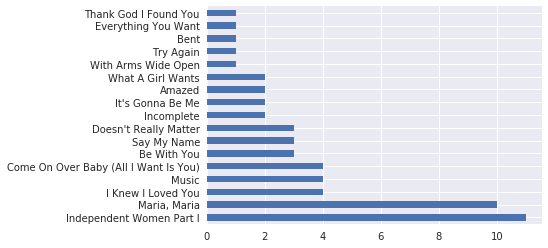

In [48]:
#los que llegaron al puesto 1 ¿cuantas semanas estuvieron?
df_ordenado.loc[df_ordenado['ranking']==1]['track'].value_counts().plot(kind='barh')

In [49]:
df_ordenado.loc[df_ordenado['ranking']==1].sort_values(['track','semana'])

,year,artist.inverted,track,time,genre,genre_artist,date.entered,date.peaked,semana,ranking
12372,2000,Lonestar,Amazed,265,Country,"Country,Pop/Rock",1999-06-05,2000-03-04,x40th.week,1.0
12689,2000,Lonestar,Amazed,265,Country,"Country,Pop/Rock",1999-06-05,2000-03-04,x41st.week,1.0
3811,2000,"Iglesias, Enrique",Be With You,216,Latin,"Latin,Pop/Rock",2000-04-01,2000-06-24,x13th.week,1.0
4128,2000,"Iglesias, Enrique",Be With You,216,Latin,"Latin,Pop/Rock",2000-04-01,2000-06-24,x14th.week,1.0
4445,2000,"Iglesias, Enrique",Be With You,216,Latin,"Latin,Pop/Rock",2000-04-01,2000-06-24,x15th.week,1.0
3819,2000,matchbox twenty,Bent,252,Rock,Pop/Rock,2000-04-29,2000-07-22,x13th.week,1.0
3174,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"Pop/Rock,R&B",2000-08-05,2000-10-14,x11th.week,1.0
3491,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"Pop/Rock,R&B",2000-08-05,2000-10-14,x12th.week,1.0
3808,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"Pop/Rock,R&B",2000-08-05,2000-10-14,x13th.week,1.0
4125,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"Pop/Rock,R&B",2000-08-05,2000-10-14,x14th.week,1.0


## Paso 6. Crear un reporte con los hallazgos, el código y las visualizaciones

Creá un reporte que describa cada uno de los seis pasos previos. Imaginá que estás describiendo tus datos, visualizaciones, problemas, hallazgos y conclusiones con tus pares. Deberá tener al menos 500 palabras. Y deberá contener el código utilizado para generar las visualizaciones, las pruebas estadísticas realizadas -y cualquier otro método que hayas utilizado- y el análisis e interpretación de los resultados- propiamente dicho.

In [50]:
#Por el valor más alto que llegaron y por el promedio de todos sus puestos
df_final['min'] = df.loc[:,'x1st.week':'x65th.week'].min(axis=1)
df_final['mean'] = df.loc[:,'x1st.week':'x65th.week'].mean(axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


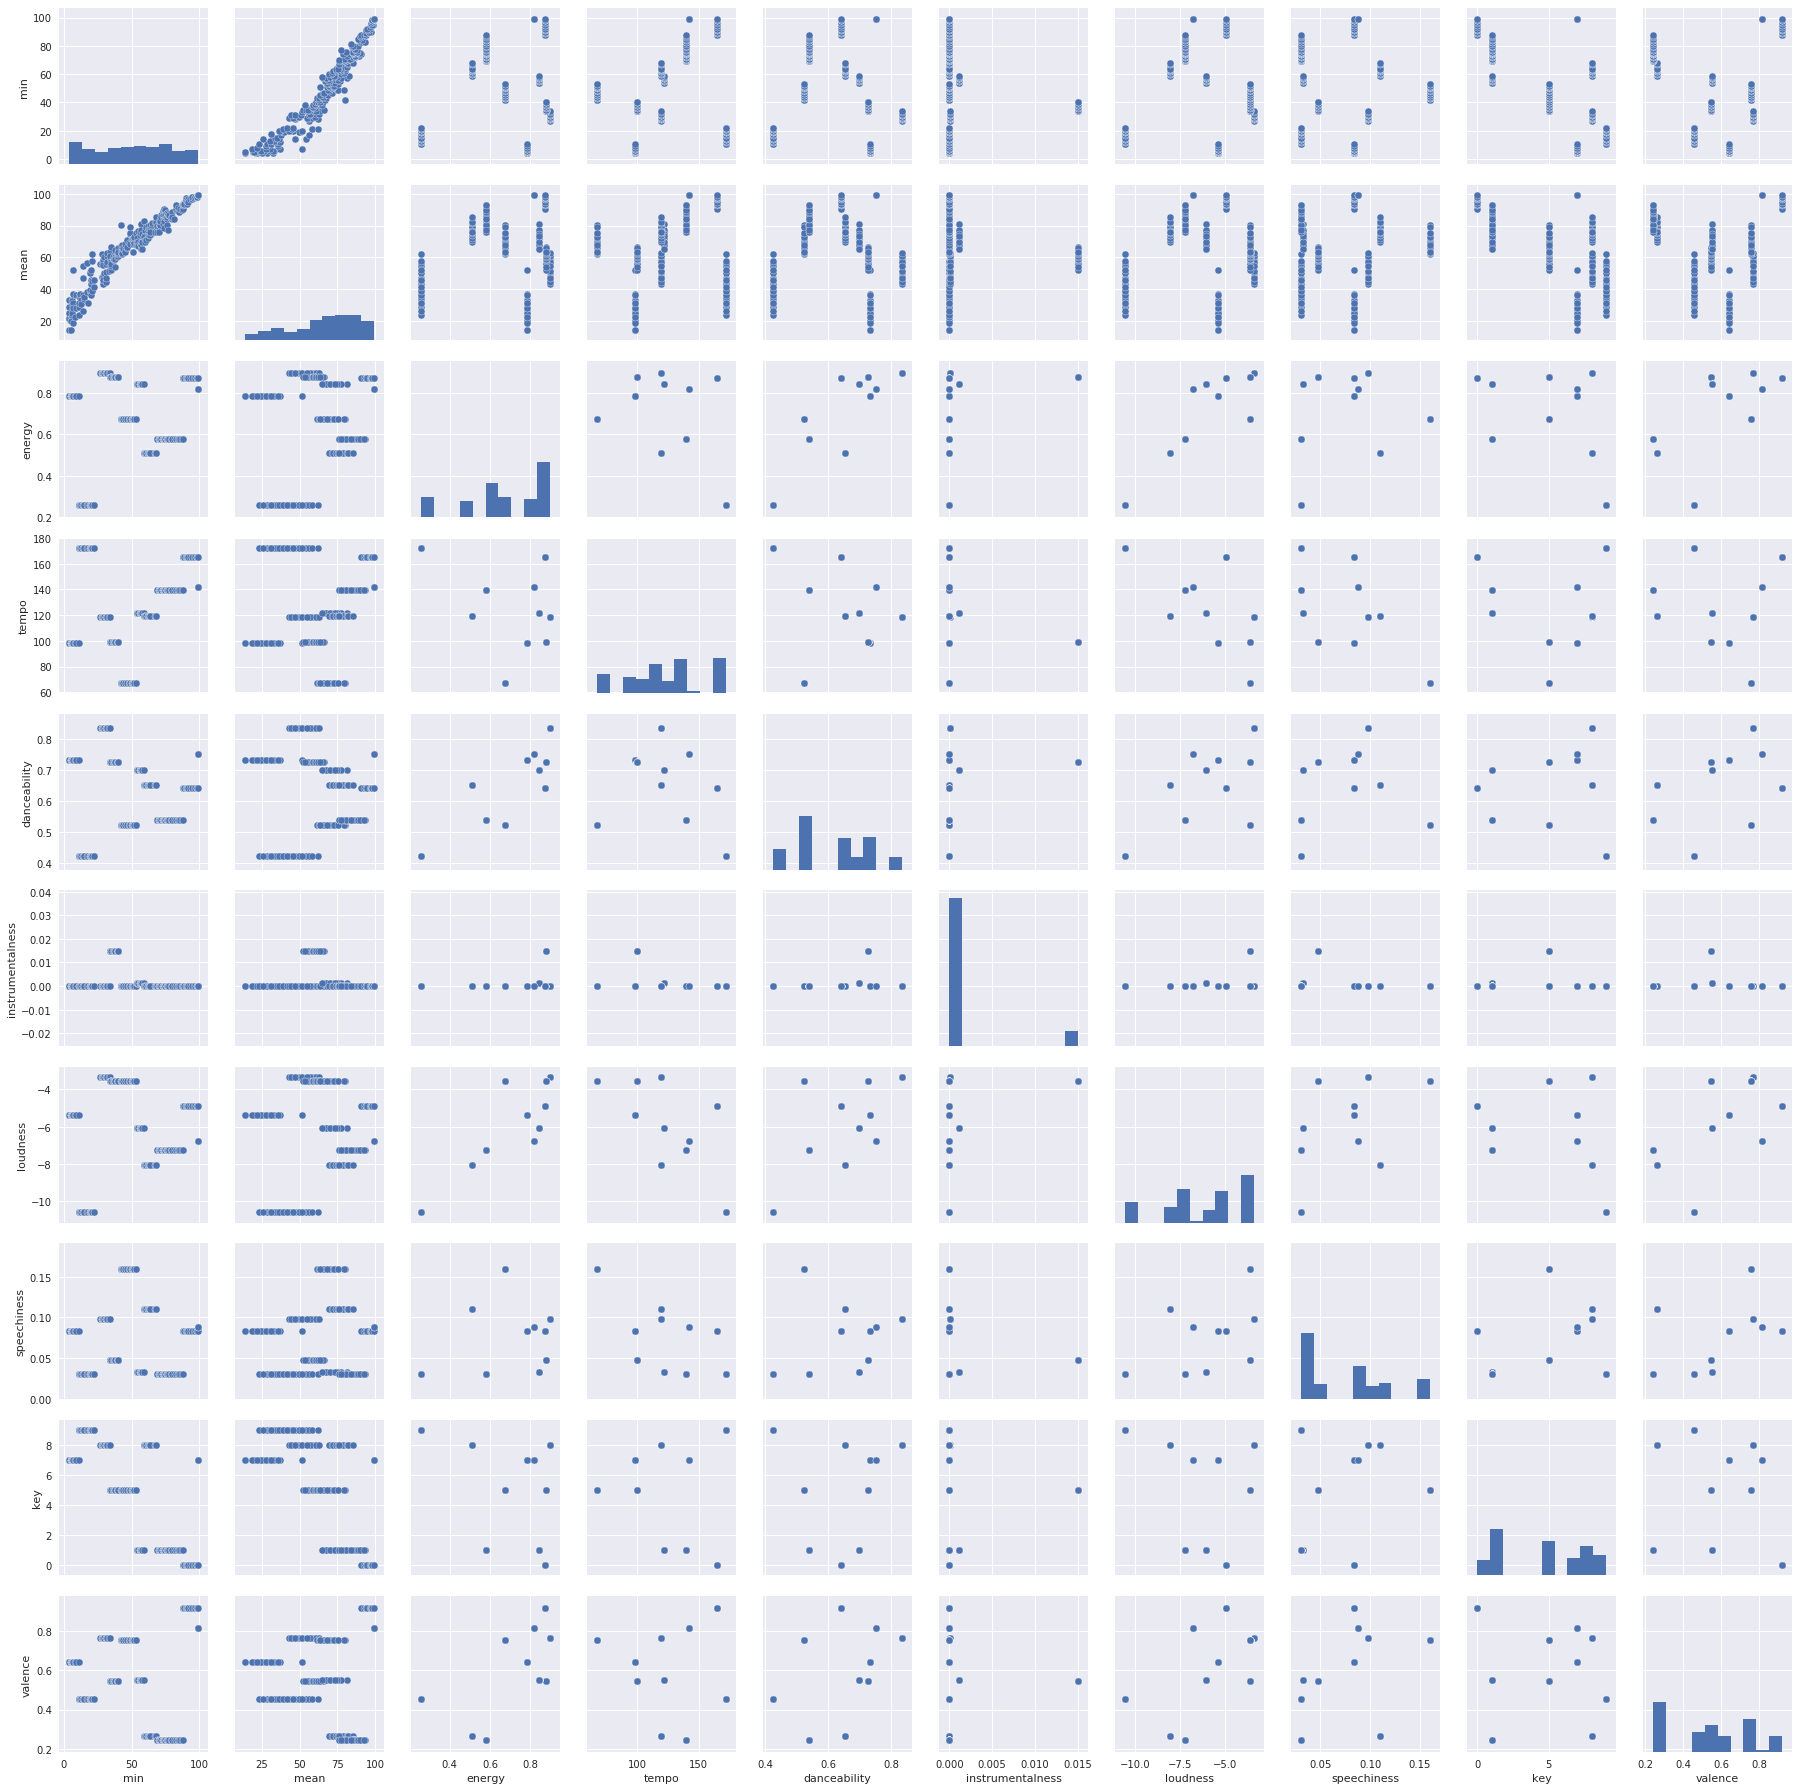

In [51]:
df_final_na = df_final[['min','mean','energy','tempo','danceability','instrumentalness','loudness','speechiness','key','valence']].dropna()
sns.pairplot(df_final_na)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


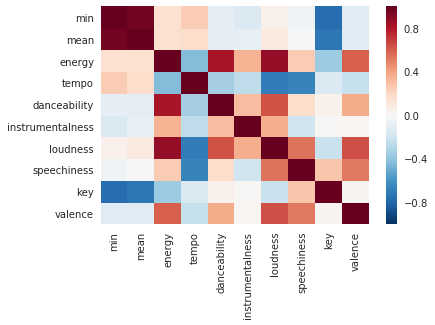

In [52]:
corr = df_final_na.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [53]:
df_final_na.corr(method='pearson', min_periods=1)

,min,mean,energy,tempo,danceability,instrumentalness,loudness,speechiness,key,valence
min,1.000000,0.964136,0.161759,0.253642,-0.095419,-0.148994,0.050674,-0.045362,-0.764304,-0.124818
mean,0.964136,1.000000,0.157371,0.179839,-0.106785,-0.088107,0.095368,0.004611,-0.719930,-0.117699
energy,0.161759,0.157371,1.000000,-0.432503,0.826248,0.348871,0.882594,0.252957,-0.366551,0.601450
tempo,0.253642,0.179839,-0.432503,1.000000,-0.341619,-0.253931,-0.697321,-0.671388,-0.143220,-0.228062
danceability,-0.095419,-0.106785,0.826248,-0.341619,1.000000,0.306994,0.634030,0.177351,0.054496,0.372082
instrumentalness,-0.148994,-0.088107,0.348871,-0.253931,0.306994,1.000000,0.359980,-0.197732,0.013866,0.018454
loudness,0.050674,0.095368,0.882594,-0.697321,0.634030,0.359980,1.000000,0.540444,-0.221278,0.641410
speechiness,-0.045362,0.004611,0.252957,-0.671388,0.177351,-0.197732,0.540444,1.000000,0.280105,0.526316
key,-0.764304,-0.719930,-0.366551,-0.143220,0.054496,0.013866,-0.221278,0.280105,1.000000,0.024502
valence,-0.124818,-0.117699,0.601450,-0.228062,0.372082,0.018454,0.641410,0.526316,0.024502,1.000000


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


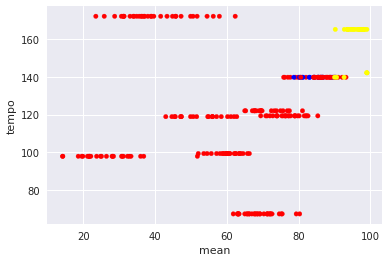

In [54]:
#Correlación entre la media del ranking y el tempo del tema por Genero (cada genero es un color)
colorDicc = {'Rock' : 'red', 'Latin':'blue', 'Country':'yellow', 'Rap':'pink', 'Pop':'black', 
             'Electronica':'white', 'Jazz' : 'orange',
             'R&B' : 'purple', 'Reggae' : 'green', 'Gospel': 'c'}
df_final[['genre','mean','tempo']].plot(kind='scatter', x = 'mean', y ='tempo' ,c = df_final['genre'].apply(lambda gen: colorDicc[gen]))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


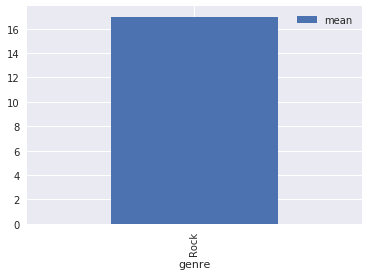

In [55]:
#Puestos N°1 por genero
df_final[['genre','mean']][df_final['min']<2].groupby('genre').count().plot(kind='bar')

In [56]:
#Definimos hit provisoriamente como un tema que estuvo en puesto 1 ó 2
#Dummies para los generos
df_final['hit'] = df_final['min'] < 3
dummies = pd.get_dummies(df_final['genre'])
df_final_dummies = df_final.join(dummies)
df_final_dummies.head()

,year,artist.inverted,track,time,genre,genre_artist,date.entered,date.peaked,semana,ranking,...,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock
0,2000,Destiny's Child,Independent Women Part I,218,Rock,R&B,2000-09-23,2000-11-18,x1st.week,78.0,...,0,0,0,0,0,0,0,0,0,1
1,2000,Destiny's Child,Independent Women Part I,218,Rock,R&B,2000-09-23,2000-11-18,x2nd.week,63.0,...,0,0,0,0,0,0,0,0,0,1
2,2000,Destiny's Child,Independent Women Part I,218,Rock,R&B,2000-09-23,2000-11-18,x3rd.week,49.0,...,0,0,0,0,0,0,0,0,0,1
3,2000,Destiny's Child,Independent Women Part I,218,Rock,R&B,2000-09-23,2000-11-18,x4th.week,33.0,...,0,0,0,0,0,0,0,0,0,1
4,2000,Destiny's Child,Independent Women Part I,218,Rock,R&B,2000-09-23,2000-11-18,x5th.week,23.0,...,0,0,0,0,0,0,0,0,0,1


## BONUS: El mismo programa para el que trabajaste te solicita escribir un white paper de al menos 500 palabras sobre el tema "cómo lidiar con la limpieza de los datos". El objetivo es que constituya una presentación para exponer ante una audiencia amplia, así que va a ser necesario incluir casos reales como ejemplos para sustentar tus planteos.

Pista: para empezar hacé una primera búsqueda en internet de artículos, blogposts, papers, videos, etc. En fin... todo lo que  te sirva para entender los desafíos que implica trabajar con datos. Este white paper debería constituir una reflexión original y personal acerca de lo aprendido en esta semana.